# An example how to systematically run VQE boosting by DBQA


[Qibo 0.2.9|INFO|2024-06-21 12:06:05]: Using numpy backend on /CPU:0
INFO:qibo.config:Using numpy backend on /CPU:0


In the VQE numpy
VQE energy is -14.53928 and the DBQA yields -14.53928. 
The target energy is -15.27613 which means the difference is for VQE 0.73685 and of the DBQA 0.73685 which can be compared to the spectral gap 1.08767.
The relative difference is for VQE 4.82354% and for DBQA 4.82354%.The energetic fidelity witness for the ground state for the
VQE is 0.32254 
and DBQA 0.32254
The true fidelity is 0.00263 
and DBQA 0.32254


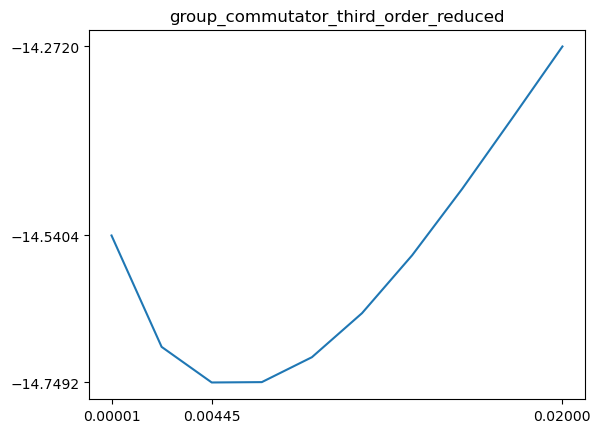

VQE energy is -14.53928 and the DBQA yields -14.53928. 
The target energy is -15.27613 which means the difference is for VQE 0.73685 and of the DBQA 0.73685 which can be compared to the spectral gap 1.08767.
The relative difference is for VQE 4.82354% and for DBQA 4.82354%.The energetic fidelity witness for the ground state for the
VQE is 0.32254 
and DBQA 0.32254
The true fidelity is 0.00263 
and DBQA 0.32254
The boosting circuit used 0 CNOT gates coming from compiled XXZ evolution and 70 CZ gates from VQE.
For 10 qubits this gives n_CNOT/n_qubits = 0.0 and n_CZ/n_qubits = 7.0
VQE energy is -14.53928 and the DBQA yields -14.53928. 
The target energy is -15.27613 which means the difference is for VQE 0.73685 and of the DBQA 0.73685 which can be compared to the spectral gap 1.08767.
The relative difference is for VQE 4.82354% and for DBQA 4.82354%.The energetic fidelity witness for the ground state for the
VQE is 0.32254 
and DBQA 0.32254
The true fidelity is 0.00263 
and DBQA 0.32254
T

In [13]:
from boostvqe.models.dbi.group_commutator_iteration_transpiler import *
def execute_gci_boost(  nqubits=10,
                        nlayers=7,
                        seed = 42,
                        target_epoch = 200,
                        nmb_gci_steps = 1,
                        nmb_gd_epochs = 1,
                        eo_d = None,
                        mode_dbr_list = [#DoubleBracketRotationType.group_commutator_reduced,
                            #DoubleBracketRotationType.group_commutator_mix_twice,
                            #DoubleBracketRotationType.group_commutator_reduced_twice,
                            DoubleBracketRotationType.group_commutator_third_order_reduced,
                            #DoubleBracketRotationType.group_commutator_third_order_reduced_twice
                            ]
                        ):
    
    gci = initialize_gci_from_vqe(
                        nqubits=nqubits,
                        nlayers=nlayers,
                        seed = seed,
                        target_epoch = target_epoch
                        )
    print_vqe_comparison_report(gci)  
    if eo_d is not None:  
        gci.eo_d = eo_d

    mode_dbr, minimizer_s, eo_d = select_recursion_step_circuit(
        gci, 
        mode_dbr_list = mode_dbr_list,
        step_grid = np.linspace(1e-5,2e-2,10),
        please_be_visual = True,
        save_path = "gci_step"
    )
    print_vqe_comparison_report(gci)
    gci = execute_selected_recursion_step( gci, mode_dbr, minimizer_s, eo_d, please_be_verbose = True )
    print_vqe_comparison_report(gci)

from boostvqe.utils import *

def get_eo_d_initializations( nqubits, eo_d_name = "B Field"):
    if eo_d_name == "B Field":
        return [
            MagneticFieldEvolutionOracle([4-np.sin(x/3) for x in range(nqubits)]),
            MagneticFieldEvolutionOracle([1+np.sin(x/3) for x in range(nqubits)]),
            MagneticFieldEvolutionOracle([1]*nqubits),
            MagneticFieldEvolutionOracle(np.linspace(0,2,nqubits)),
            MagneticFieldEvolutionOracle(np.linspace(0,1,nqubits)),
            ]
    elif eo_d_name == "H_ClassicalIsing(B,J)":
        return [  
            IsingNNEvolutionOracle([0]*nqubits, [1]*nqubits)           
            ]
dict_params = []
for nqubits in [10]:
    for nlayers in [7]:
        for seed in [42]:
            for target_epoch in [200]:
                for eo_d in get_eo_d_initializations(nqubits)[0:1]:
                    mode_dbr_list =[#DoubleBracketRotationType.group_commutator_reduced,
                            #DoubleBracketRotationType.group_commutator_mix_twice,
                            #DoubleBracketRotationType.group_commutator_reduced_twice,
                            DoubleBracketRotationType.group_commutator_third_order_reduced,
                            #DoubleBracketRotationType.group_commutator_third_order_reduced_twice
                            ]
                    dict_params.append( dict(
                        nqubits=nqubits,
                        nlayers=nlayers,
                        seed = seed,
                        target_epoch = target_epoch,
                        nmb_gci_steps = 3,
                        nmb_gd_epochs = 2,
                        eo_d = eo_d,
                        mode_dbr_list = mode_dbr_list
                    ))
                    execute_gci_boost( **dict_params[-1] )
                        
                    
